<a href="https://colab.research.google.com/github/manu9418/IRH/blob/main/MAIRH_TF_Kostiakov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método Kostiakov

In [ ]:
## Importando librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
plt.rcParams.update({'font.size': 24})

In [ ]:
## Ingreso de datos recolectados
t_acumulado_min = np.array([0,3,7,12,27,45,77,118,177])
lamina_inf_acum_cm = np.array([0,0.53,1.08,1.65,2.73,\
                              3.65,4.94,5.67,6.87])

In [ ]:
## Dataframe con datos ingresados
df = pd.DataFrame(data= lamina_inf_acum_cm, 
                  index= t_acumulado_min, 
                  columns=['LIA (cm)']
                  )
df.index.name = 't (min)' 
## en su defecto usar df.index.set_names('t_min')

## Calculando el log de t
log_t = [np.log10(i) for i in list(t_acumulado_min) if i>0]
if len(t_acumulado_min)==len(log_t):
  print("misma longitud entre t y logt")
else:
  nlen = len(t_acumulado_min)-len(log_t)
  for i in range(nlen):
    log_t.insert(0,np.nan)
df['log t'] = np.asarray(log_t)

## Calculando el log de lamina de infiltracion acumulada en cm
log_lam = [np.log10(i) for i in list(lamina_inf_acum_cm) if i>0]
if len(lamina_inf_acum_cm)==len(log_lam):
  print("misma longitud entre lamina y log lamina")
else:
  nlen2 = len(lamina_inf_acum_cm)-len(log_lam)
  for i in range(nlen2):
    log_lam.insert(0,np.nan)
df['log LIA'] = np.asarray(log_lam)

## Dataframe con todos los valores
df

,LIA (cm),log t,log LIA
t (min),,,
0,0.00,NaN,NaN
3,0.53,0.477121,-0.275724
7,1.08,0.845098,0.033424
12,1.65,1.079181,0.217484
27,2.73,1.431364,0.436163
45,3.65,1.653213,0.562293
77,4.94,1.886491,0.693727
118,5.67,2.071882,0.753583
177,6.87,2.247973,0.836957


In [ ]:
df_new = df[df['log LIA']>0]
df_new #.plot(x='log t',y='log LIA')

,LIA (cm),log t,log LIA
t (min),,,
7,1.08,0.845098,0.033424
12,1.65,1.079181,0.217484
27,2.73,1.431364,0.436163
45,3.65,1.653213,0.562293
77,4.94,1.886491,0.693727
118,5.67,2.071882,0.753583
177,6.87,2.247973,0.836957


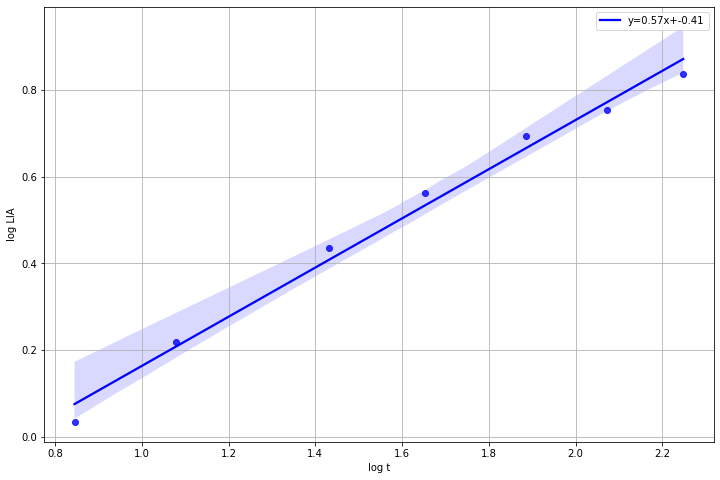

In [ ]:
## Obtener coeficientes del ajuste lineal
slope, intercept, r_value, p_value, std_err = stats.linregress(
                                              x= df_new['log t'],
                                              y= df_new['log LIA']
                                              )
## set tamanho de la figura
fig1 = plt.figure(figsize = (12,8))
ax1 = fig1.add_subplot(111)

## plot
sns.regplot(x="log t", y="log LIA", data=df_new, color='b', 
 line_kws={
      'label':"y={0:.2f}x+{1:.2f}".format(slope,intercept)},
 ax=ax1)
ax1.grid()
ax1.legend() #(loc = 'upper right', fontsize = 14)
plt.show()

In [ ]:
print('y = ',slope,'* x +',intercept)

y =  0.5678621447602188 * x + -0.40500835104519617


In [ ]:
logA = intercept
A = pow(10,intercept)
B = slope

print('F =', np.round(A,4),'* t ^(',np.round(B,4),')') 

F = 0.3935 * t ^( 0.5679 )
